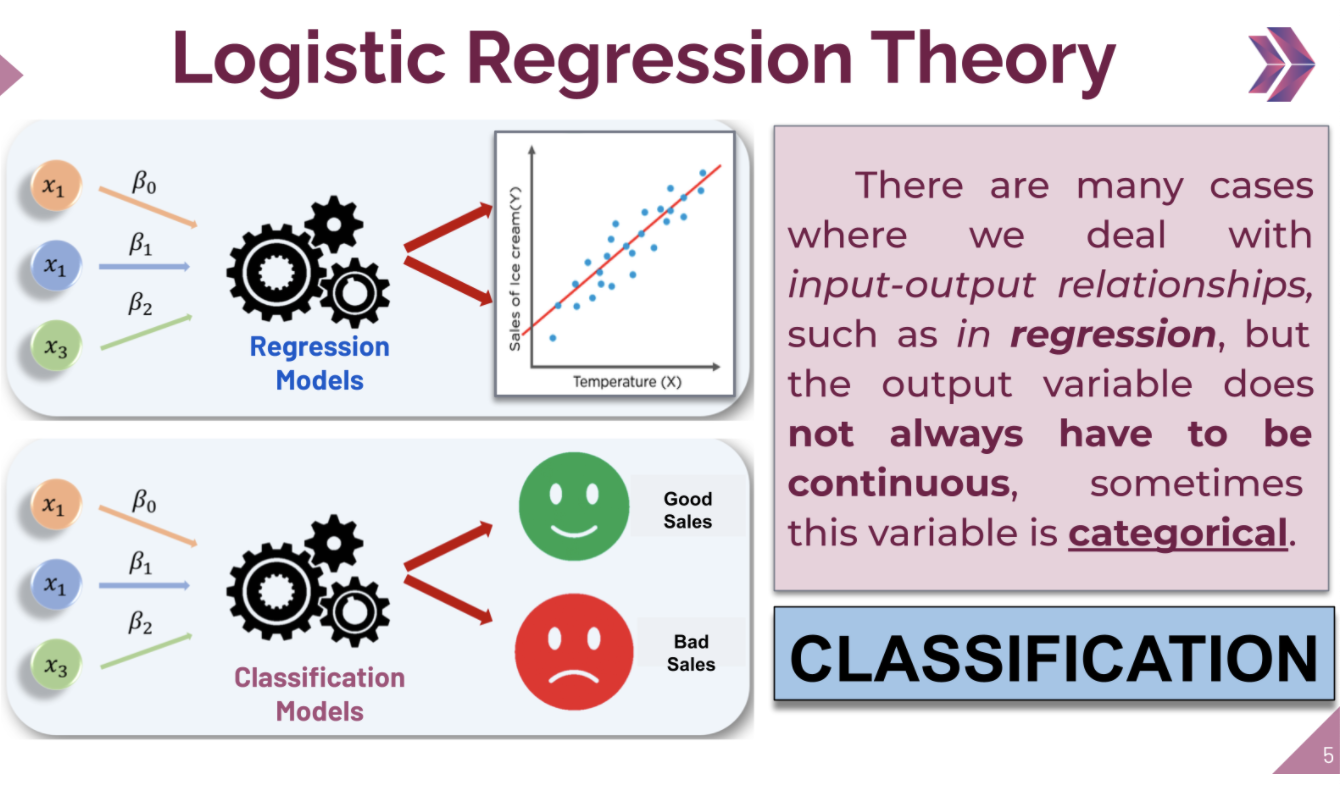

skorlarımız continuous olduğunda lineer regression, categorical olduğunda classification (lojistik regression)
Target kategorik.

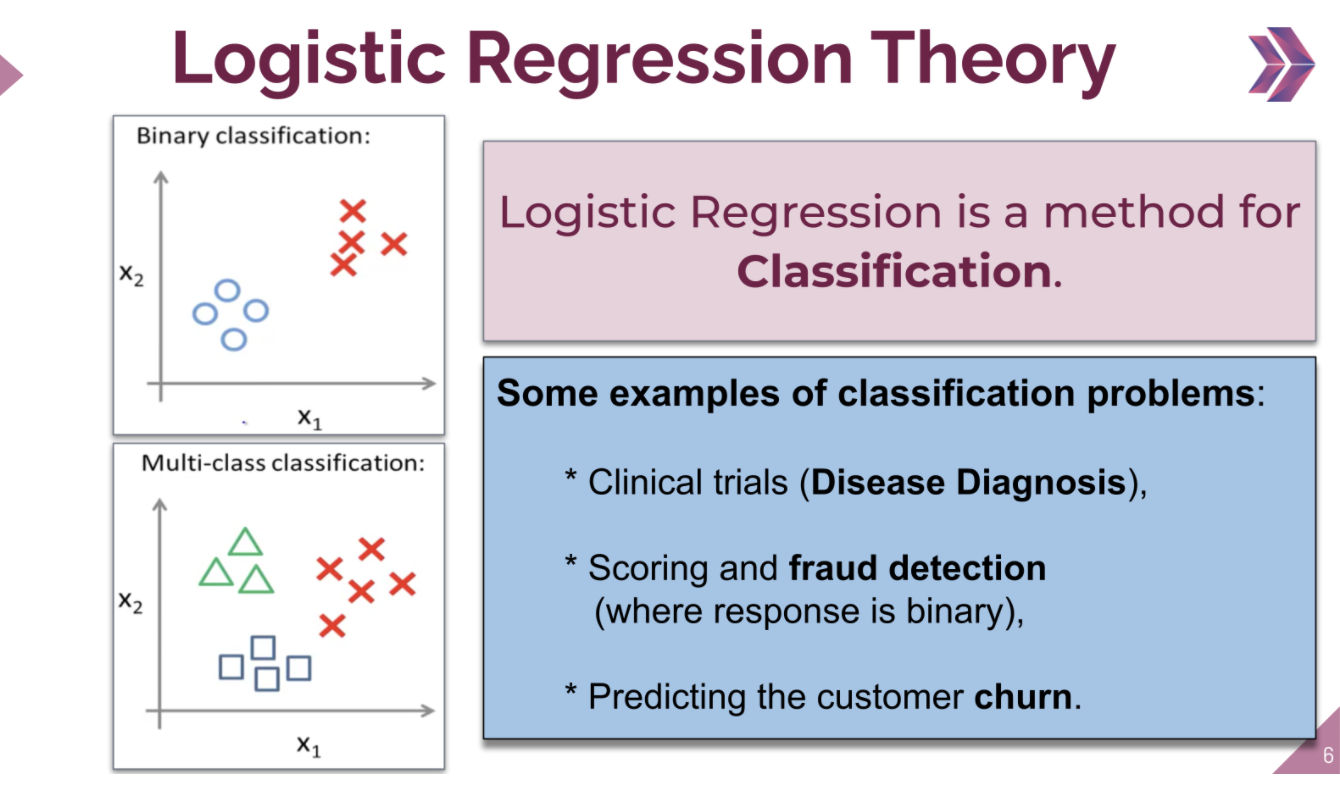

çalışma saatlerini geçti ve kaldı diye sınıflandırırsam ve bunu plotladığımda doğru plotlayabilir miyim. bana line çizebilir mi? çizer ama doğru olmaz. (aşağıda görüldüğü gibi) Biz bunu Lojistic Regression ile çözüyoruz.
Koyarsak cok yuksek rmse skorlari aliriz.


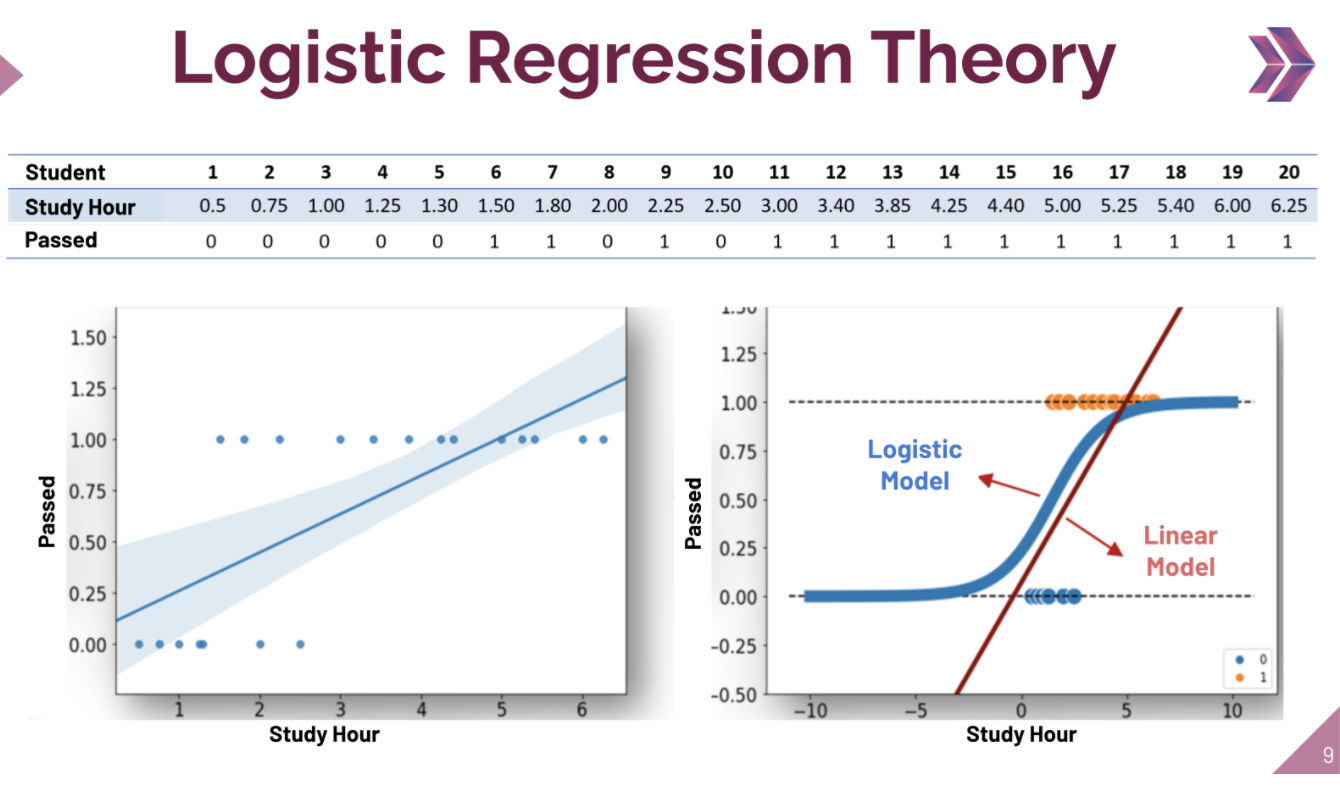

0-1 eksenimi probability e çevirmem lazım.logit function

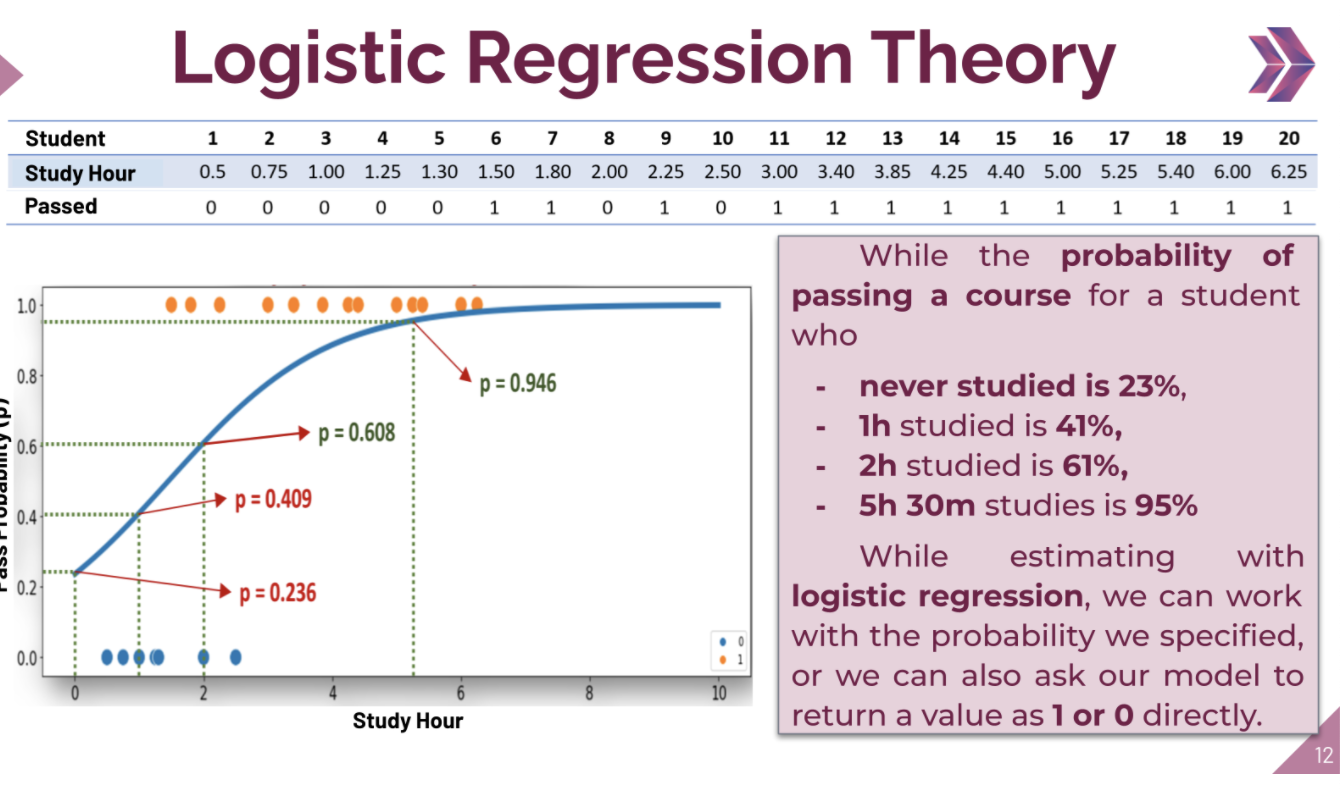

hiç çalışmadan geçenlerin oranı 23%, bunların yüzde 77 si ise kalmış demektir.
1 saat çalışanlardan geçenlerin oranı 41%,
2 saat çalışanlardan geçenlerin oranı 61%,
5h30m çalışanlardan geçenlerin oranı 95%.
mavi eğri, çalışma saatlerinin geçme ihtimalinini veriyor.

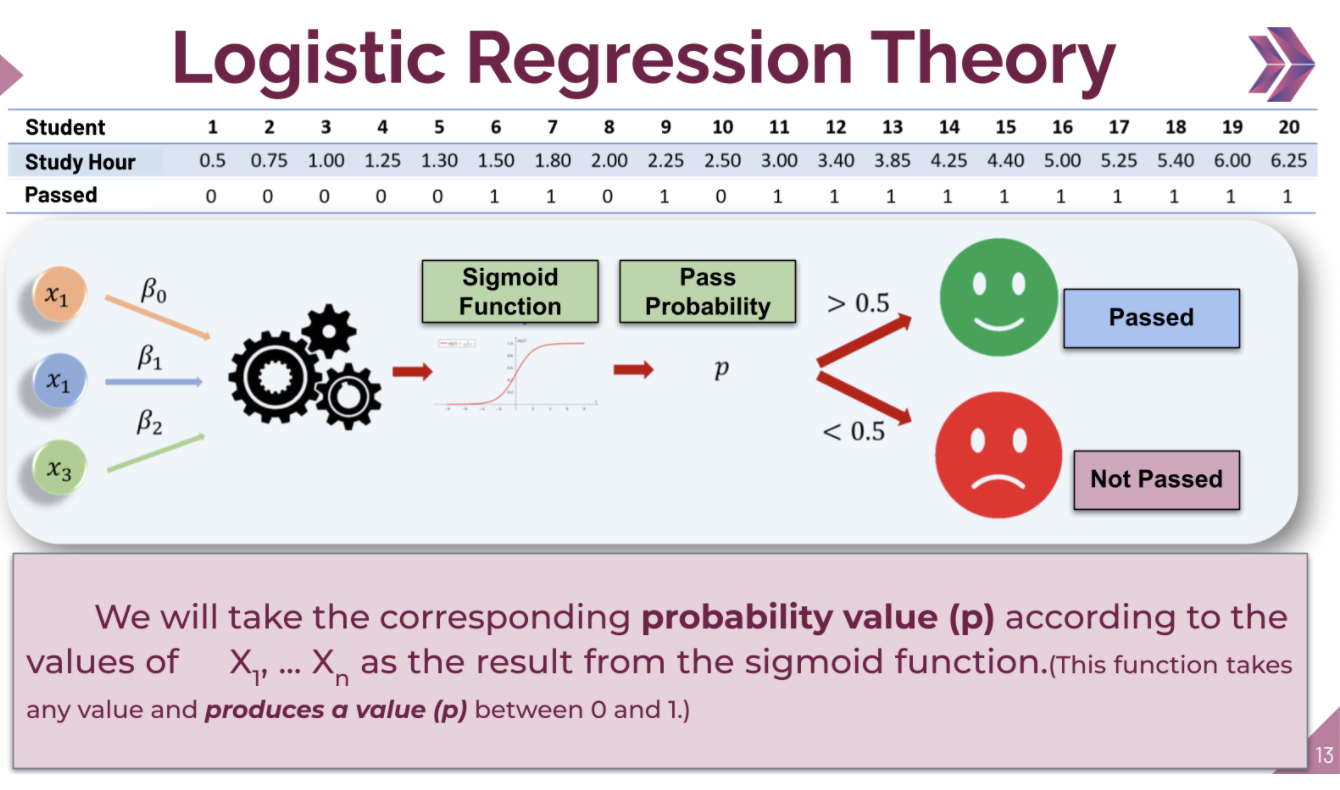

featuerlarımı alıyor, coef. ları buluyor, sigmoid func. ile presliyor (0-1 arası) sonra probability alıyor ve bu probability ye göre passed/not passed şeklinde çıktı veriyor.

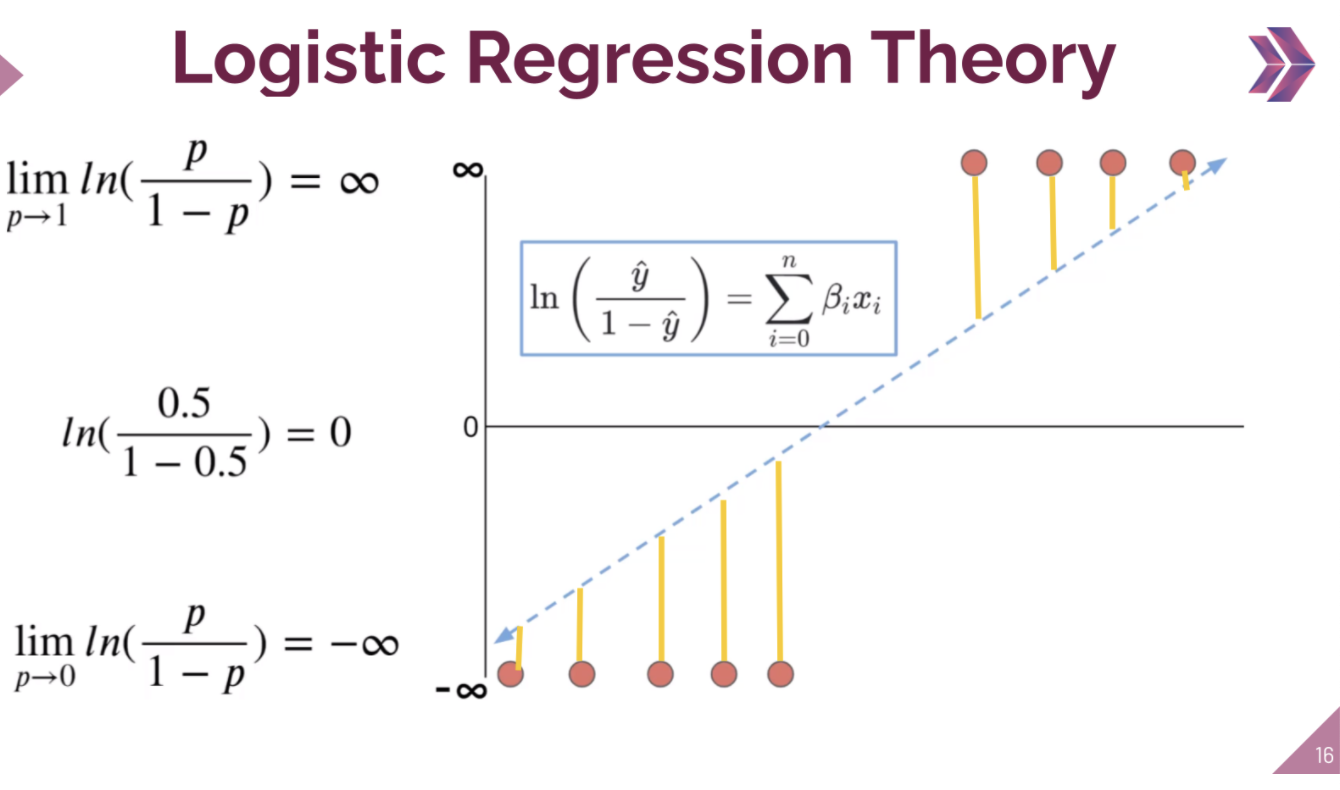

1 ve 0 değerlerinin log.unu alırsanız. bir taraf + sonsuza gidiyor diğer taraf - sonsuza gidiyor. şimdi benim bir class ım + sonsuzda bir class ım - sonsuzda. ben buraya lineer regression oturtsam residual hesaplayabilir miyim? aradaki farkları hesaplayabilir miyim? hayır. ya - sonsuz ya + sonsuz çıkar. peki napıyorum?  


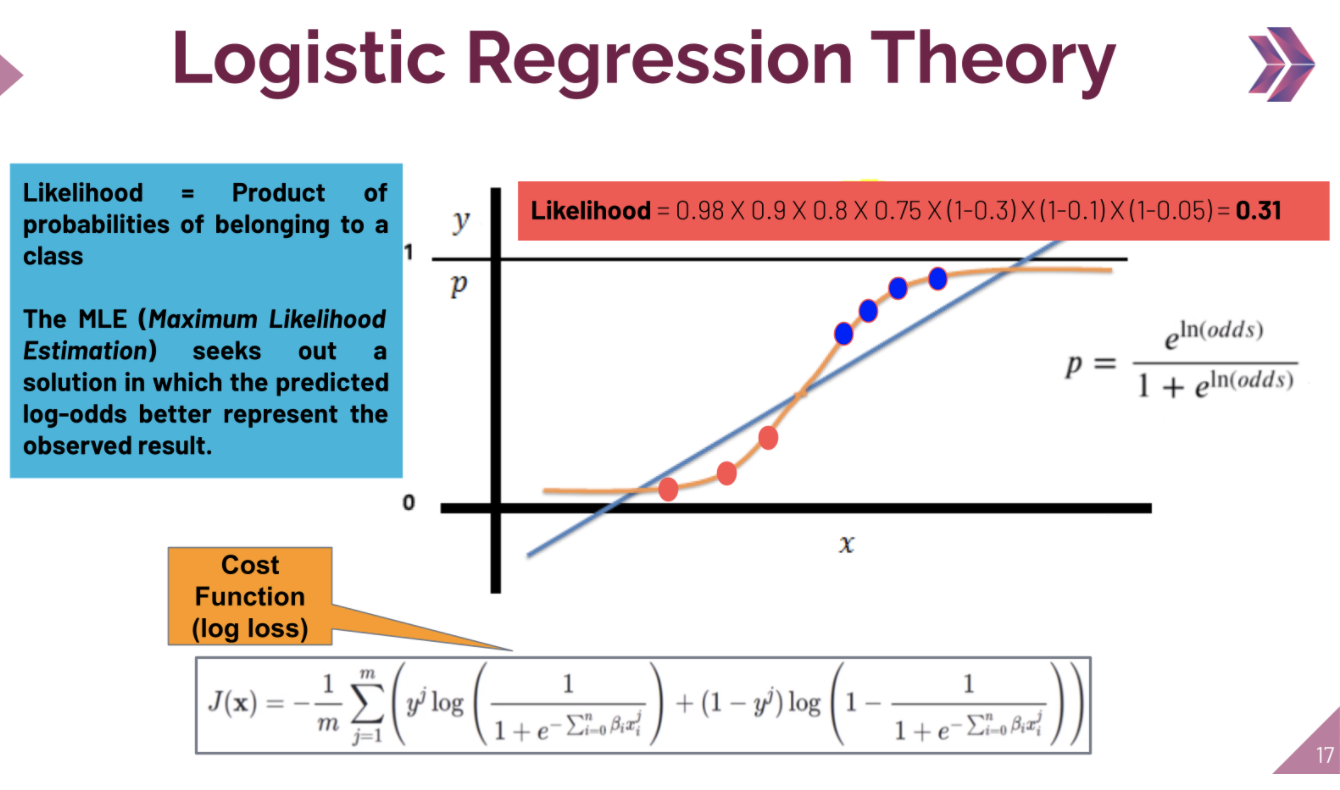

maximum likelihood ile olur. modelin gücü artar.

Cos func min edince likehood max etmiş oluruz.
Cunku log likelihood her zaman negatif, onu minimize edince en yuksek skoru elde etmis oluyoruz.

Arti sonsuzun karesini alir sonra da matematik nobeli (matematik nobeli yok da ona esdeger birseyler var) ne ise onu alir sonra da omrumuzun sonuna kadar yatis.

cost function arka planda bunu çalıştırıyor ve ortaya bir S line çıkıyor.

S line dan sonra olayı yorumlama kalıyor bunu da classification error metrics ler ile yapıyoruz.

likelihood modelimizin gözlemleri ne kadar yüksek olasılıklarla tahmin ettiğini gösterir.

![Ekran Resmi 2022-01-20 20.34.12.png](attachment:58bc6da0-3771-4c8e-a32d-ebfa55989fa6.png)

2.inde 2 kategori var onalrı ayırıyorum.

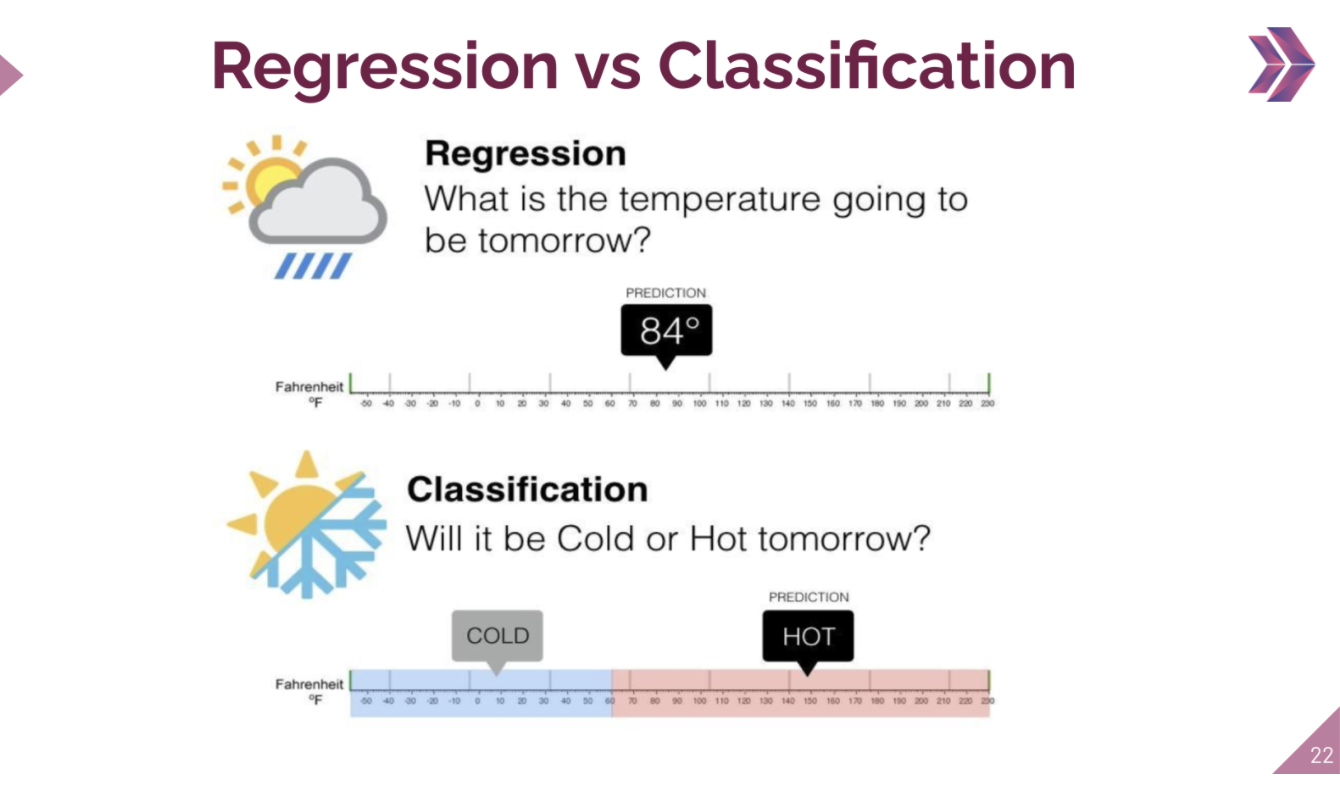

Model Değerlendirme:

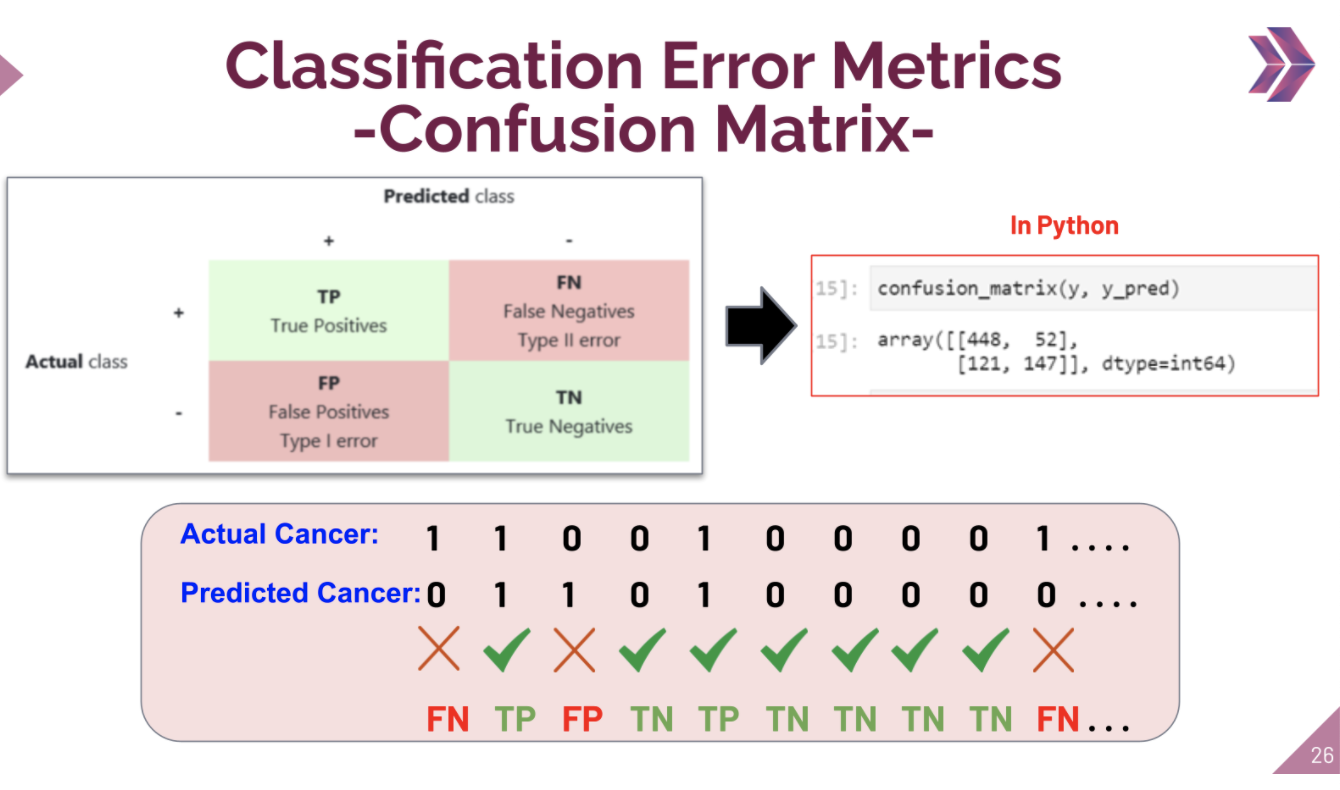

yorumlamayı aşağıdaki 4 metriğe göre yapıyoruz:


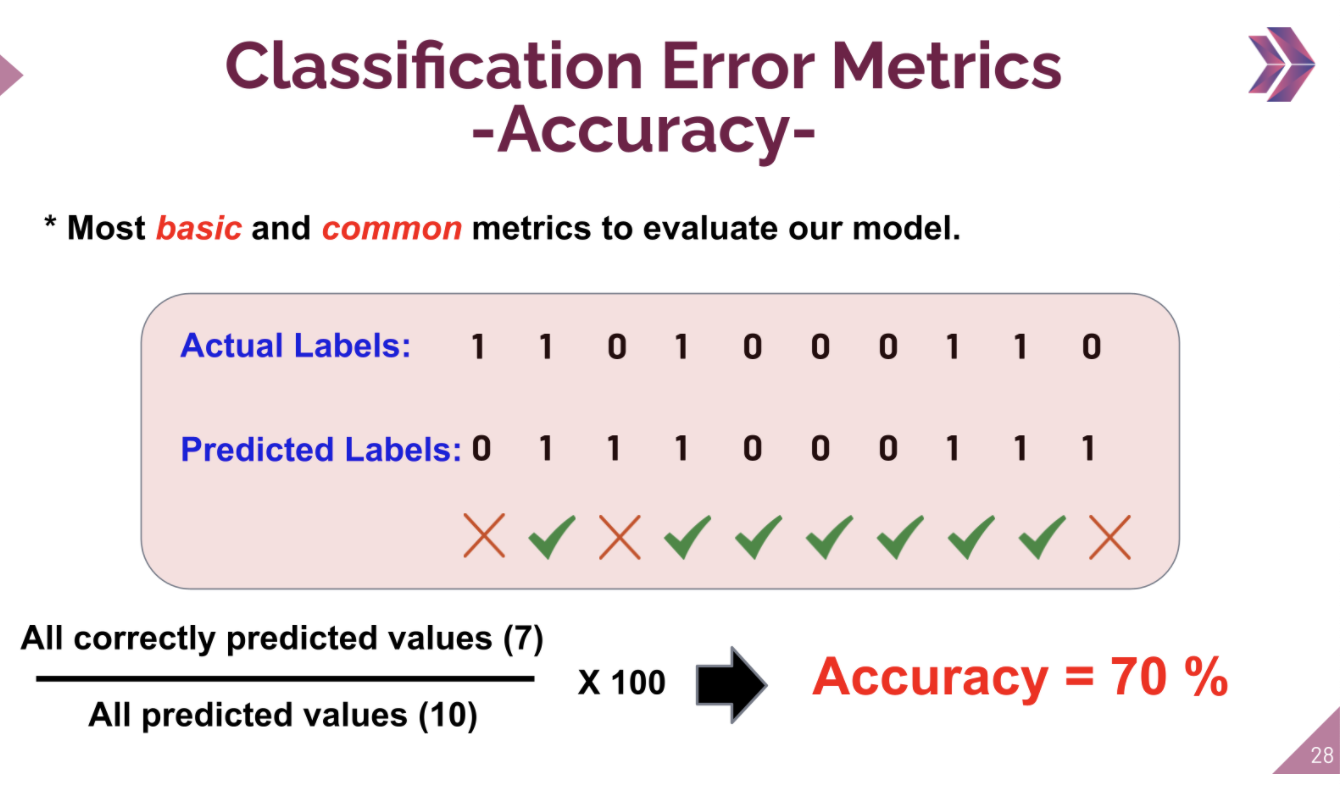

Dogru bildiklerimizi yukarı yazıyoruz.

sizin modelinizin doğruları ne kadar yakaladığına bakar. bütün predictlerin (negatif veya pozitif) doğru bildiklerini (true olanları) sayar ve toplama böler. 

Accuracy en son bakacağımız metric olmalı. çünkü bizi yanıldır. Unbalanst bir data ile karşılaştığında accuracy %95 çıkabilir ama asıl yakalamaya çalıştığın şeyi yakalayamayabilirsiniz. 

Mesela Kanser hastalarını bulmaya çalışırken ..

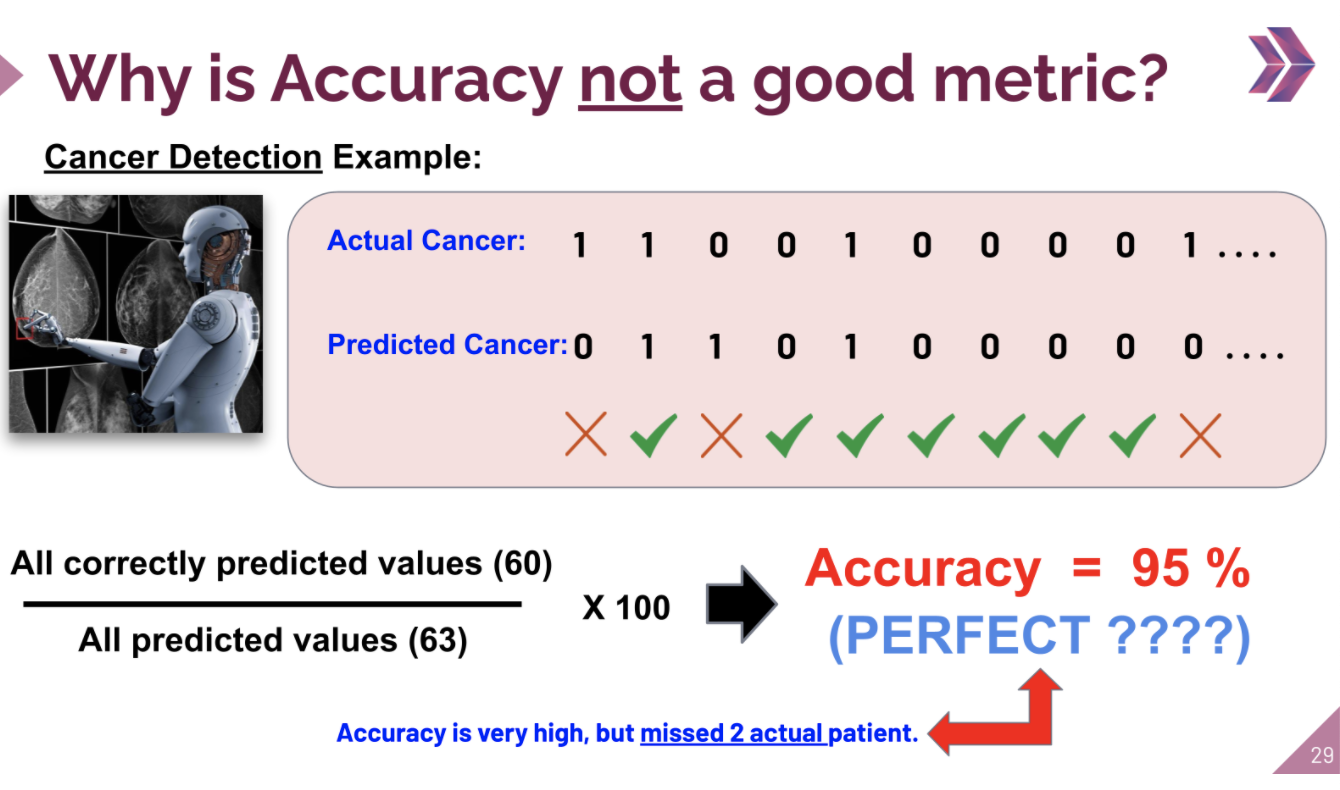

Accuaray bizi yanıltır. 

gerçekte 5 tane kanser hastası var 58 tane hasta olmayan var. eğer ben accuracy e bakarsam yanılırım. %95 yüksek gözükse de bunun içinde kanser olan ve olmayan tüm hastaların tahminlerinin %95 oranda doğru tutması söz konusudur. Fakat 5 kanser hastasından 2 sini kaçırmış. Bu kötü bir performans!
En son bakacağınız metrik Accuracy olsun!!

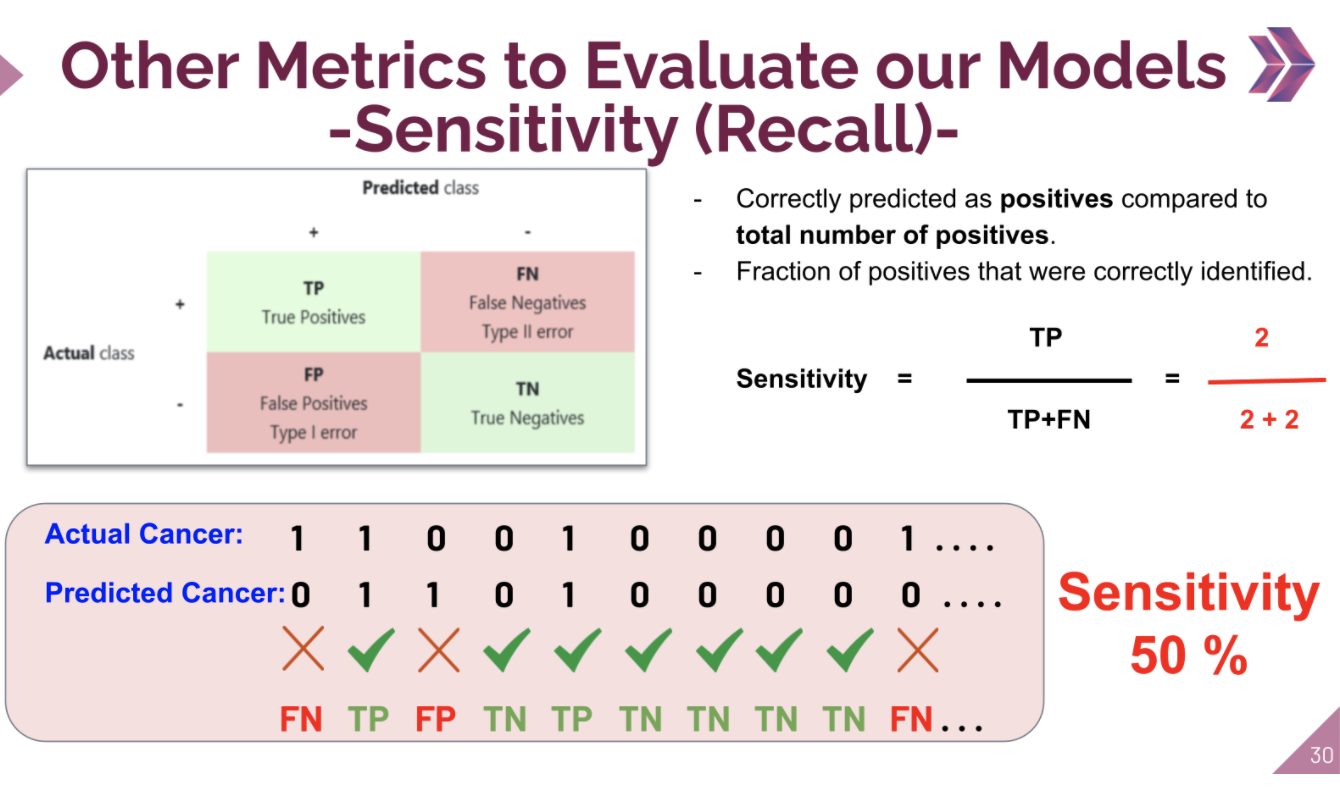

Recall sensivity: type1 errorlarının tamamını verir. Gerçek hayatta kanser olanların kaç tanesini bildiniz. bunun oranını verir. Olayımız True pozitifler ile false negatiflerle. burdaki Recall değerimiz yüzde 50. yani gerçek hayatta kanser olanların yarısını bulabilmiş. bu çok kötü bir tahmin.






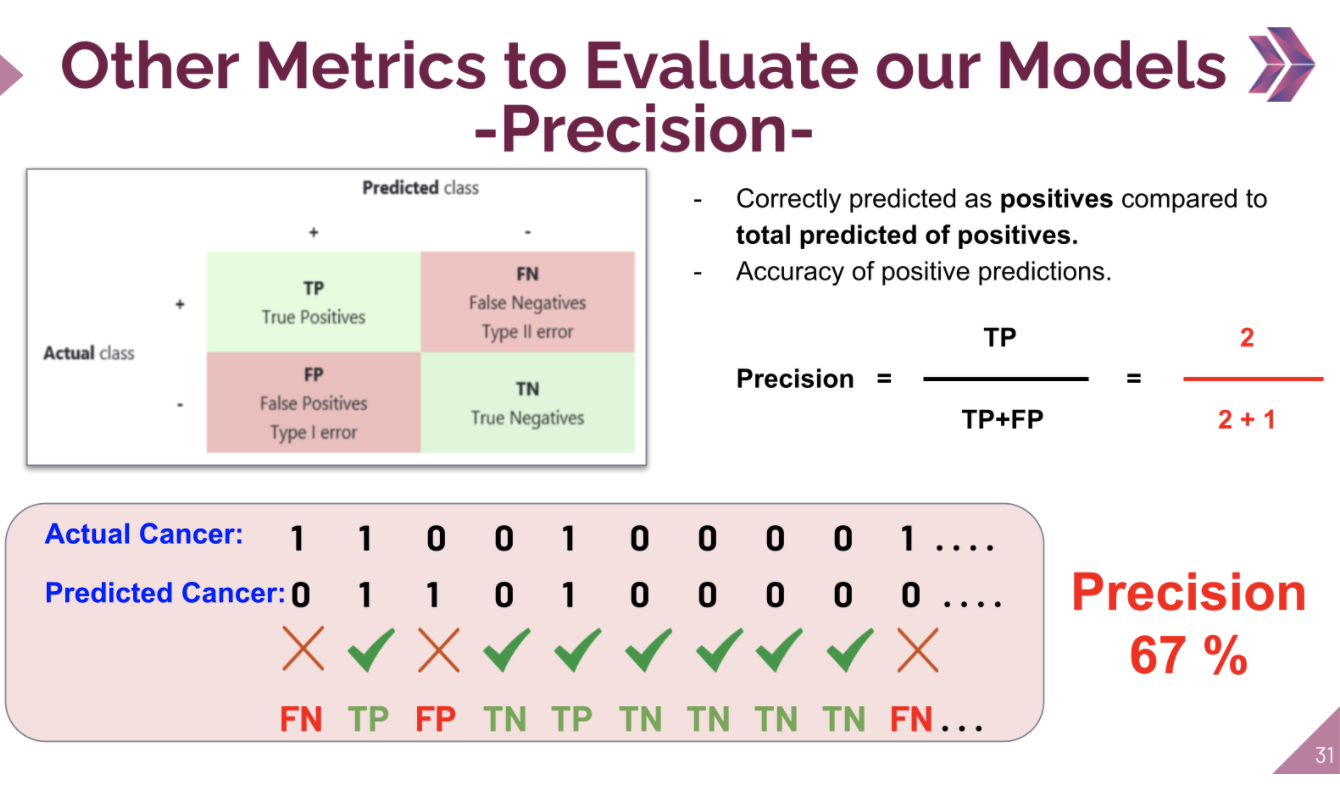

Tahminlerimin kaçta kaçı doğru. 

Precision: yaptığım tahminlerin kaç tanesi kanser?. bu da Precision. True pozitifler ile False pozitifleri (kanser olmayıp bizim kanser dediğimiz hastalar) topluyoruz. burda yüzde 67 çıktı. Yani tahmin ettiklerimin % 67 si kanser çıktı. 

Tahminlerimin gücü... tahminlerimin kaçta kaçında kanser olanları buldum.

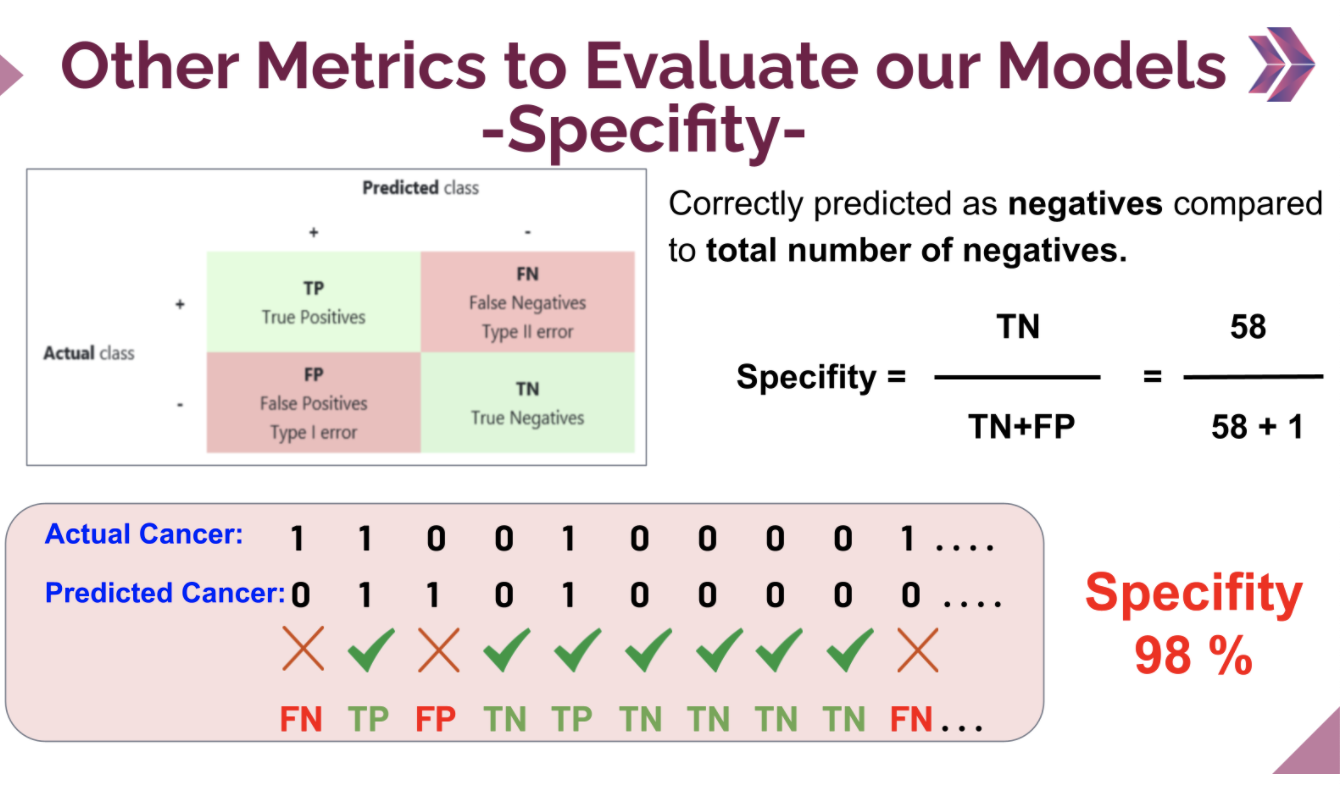

Specifity: True negatif tarafından yani alternatif hipotez tarafından bakıyorsun. gerçek hayatta kanser olmayanların kaç tanesini bildi? Gerçek hayatta kanser olmayanların Yüzde 98 ini bilmiş. ama benim istediğim bu değil tabi ki. ben recall değerini öğrenmek isterim.

specifity = =0'ın recall'u


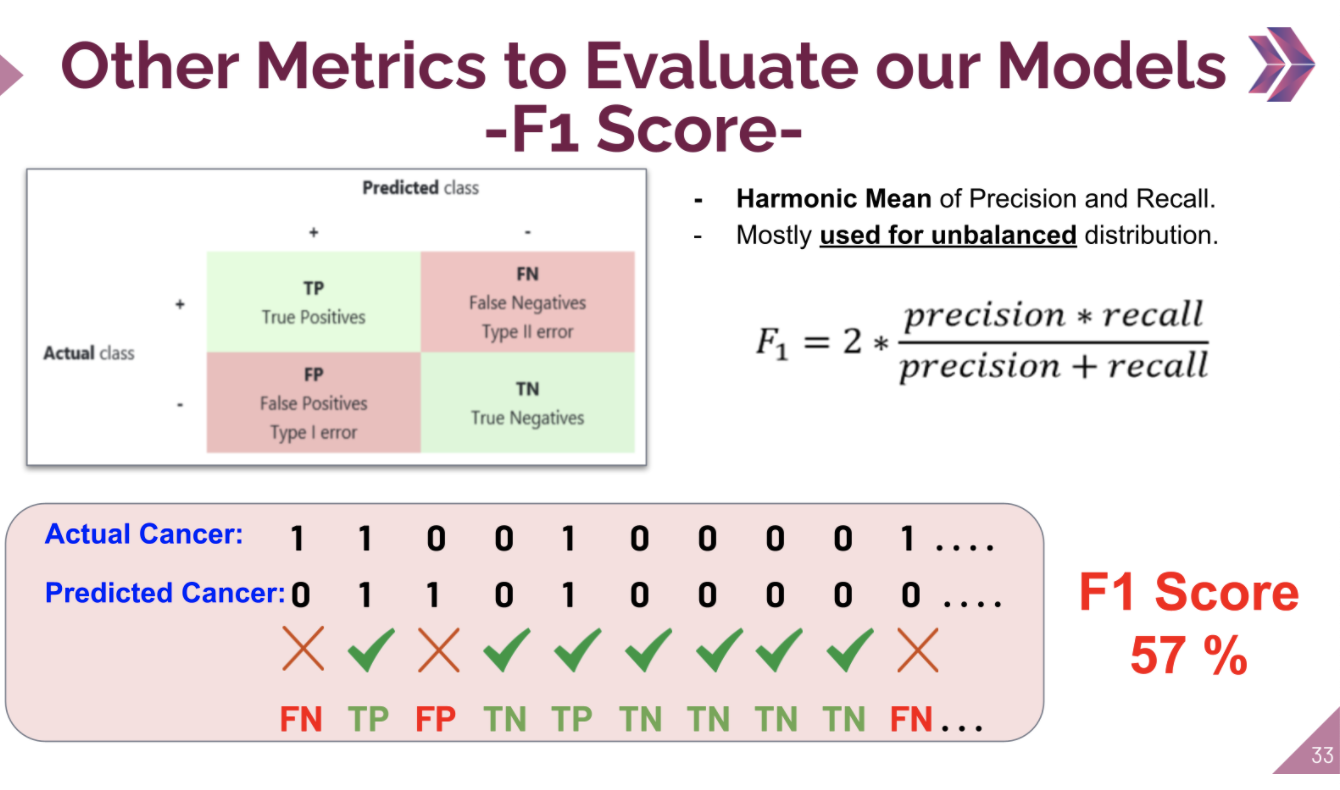

Harmonik ortalama. 
precision ve recall'ın harmonik ortalamasını alıyorum çünkü. birisi birisinin açığını kapatmasın diye, optimum ortalamayı bulsun diye.


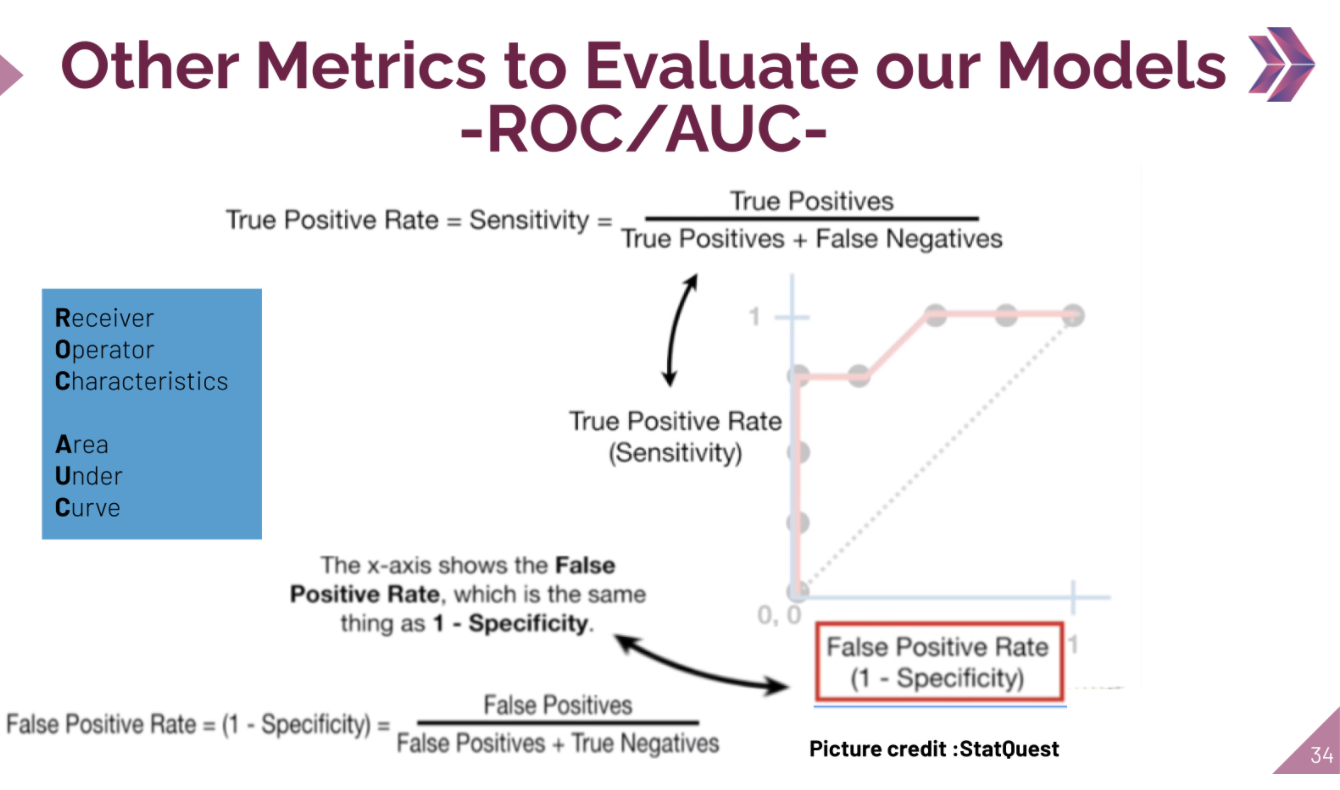

Alttaki alan ne kadar byürse o kadar iyi tahminler yapıyor.

 ROC-AUC modelin genel performansını verdiğini ve sınıfları ne kadar yüksek olasılıklarla ayırdığı önemlidir.


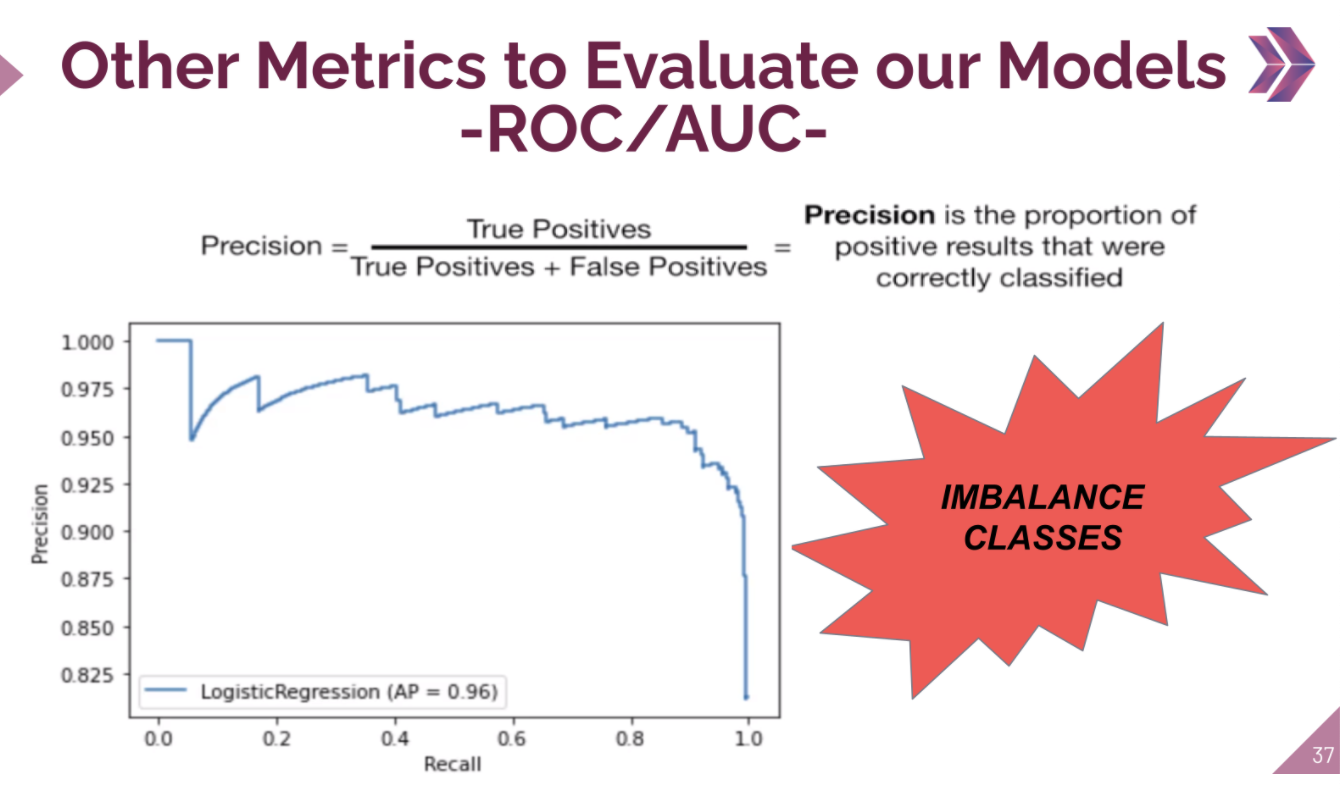








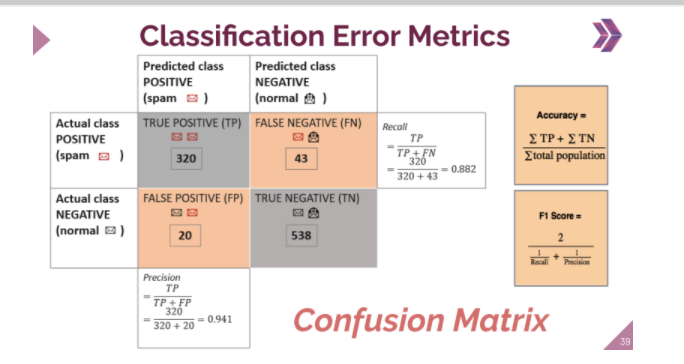



# Logistic Regression

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [30]:
df = pd.read_csv('hearing_test.csv') #../data&resources/

In [31]:
df.head()

# 1 olan değerler işitme testini geçenler, 0 olanlar geçemeyenler.

age  physical_score  test_result
0 33.000          40.700            1
1 50.000          37.200            1
2 52.000          24.700            0
3 56.000          31.000            0
4 35.000          42.900            1

## Exploratory Data Analysis and Visualization

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [33]:
df.describe().T

count   mean    std    min    25%    50%    75%    max
age            5000.000 51.609 11.287 18.000 43.000 51.000 60.000 90.000
physical_score 5000.000 32.760  8.170 -0.000 26.700 35.300 38.900 50.000
test_result    5000.000  0.600  0.490  0.000  0.000  1.000  1.000  1.000

In [34]:
df['test_result'].value_counts()

# 1 ve 0'lar arasında balance durumuna baktık, burada çok belirgin bir fark yok.

1    3000
0    2000
Name: test_result, dtype: int64

In [2]:
ax = sns.countplot(df['test_result'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

NameError: name 'sns' is not defined

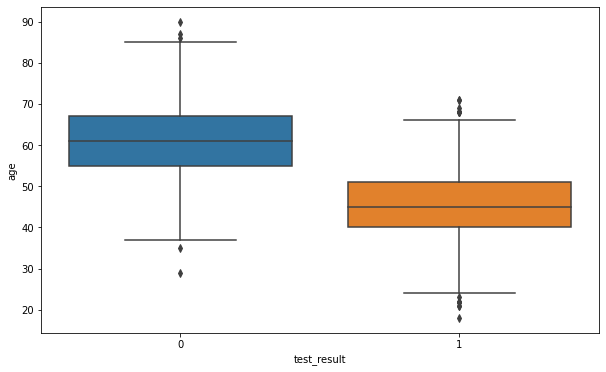

In [36]:
sns.boxplot(x='test_result',y='age',data=df);

# gecnlerin testi gcetiği yaslıların gecemdiği cıkıyor.

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

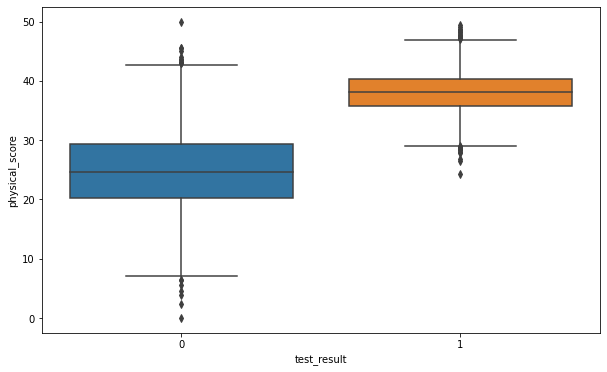

In [37]:
sns.boxplot(x='test_result',y='physical_score',data=df)

# fiziksel skoru iyi olanlar testi gecmiş.
# Fiziksel skoru yüksek olanların çoğu testi geçmiş. Fiziksel skoru 30'un altında olanlar genel olarak geçememiş.

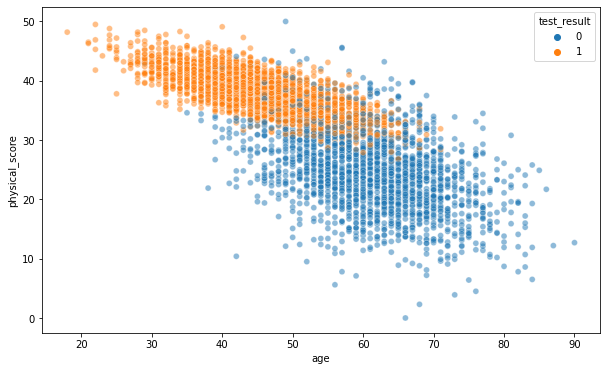

In [38]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5); 

# Fziksel skor belirleyici olmus.

# Turuncu renkli olanlar(gençler) genel olarak testi geçerken, mavi olanlar geçememiş. 
# Görsele bakarak, fiziksel skorun age'e göre çok daha belirleyici bir sütun olduğunu anlıyoruz.

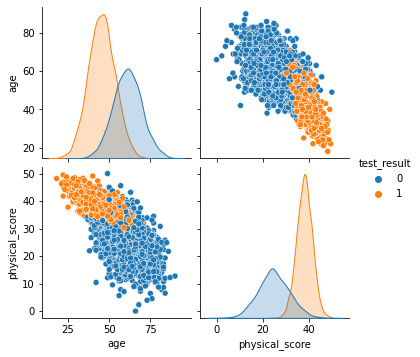

In [39]:
sns.pairplot(df,hue='test_result');

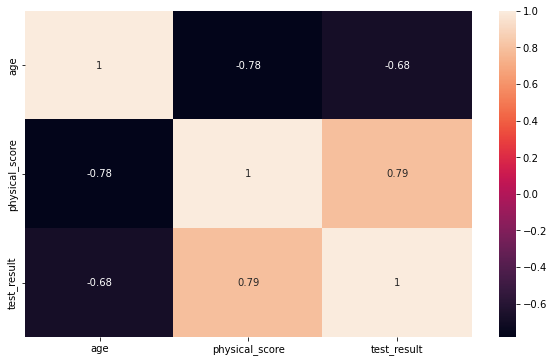

In [40]:
sns.heatmap(df.corr(), annot=True);

# Yaş azaldıkça testi geçme oranı artmış. 
# Fiziksel skor arttıkça testi geçme oranı artmış.

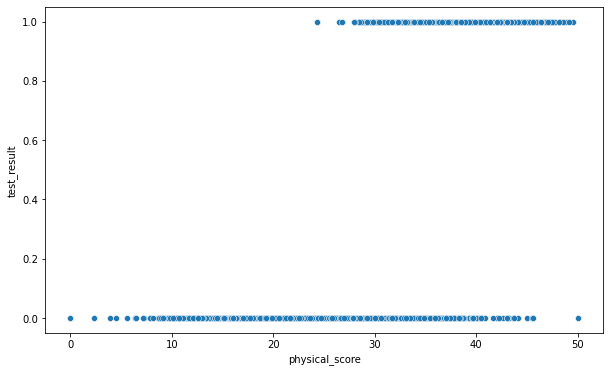

In [41]:
sns.scatterplot(x='physical_score',y='test_result',data=df);

# Testi geçenler 20-50 arasında;
# Testi geçemeyenler 0-50 arasında.

## Train | Test Split and Scaling

In [43]:
X = df.drop('test_result',axis=1)
y = df['test_result']

# test_result target label. Buna göre split ve scale işlemlerini uyguladık.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# veri az test kısmına az ayırıyor. amac traine max eğitim için ???
# Datanın %90' ını train için, %10'unu test için ayırdık.

In [46]:
scaler = StandardScaler()

# xtrainde yapılır bütün dataya ait st sapma üzerinden  ???? 

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# X_test_scaler'a fit islemi uygulanmaz. Cunku modelimiz X+train'deki bilgilerden kopye cekebilir.(Data leakage)

## Modelling

Logistic Regression da bir linear modeldir. Sayısal verileri olasılık üzerinden bir classification'a çevirir. Arka planda Linear Regression çalışır ama Linear Regression da alamadığımız verileri bir trick ile olasılıklara dönüştürür. Yani -∞ ile +∞ arasındaki sayıları 0 ile 1 arasına sıkıştırır. Default değeri 0.5'tir. 0.5 üzerini 1, 0.5 altını 0 olarak kabul eder.

In [48]:
from sklearn.linear_model import LogisticRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [49]:
#help(LogisticRegression)

In [50]:
log_model = LogisticRegression() # sayısal değişkenleri 0 ve 1 e cevirir.

Linear Regression haricinde bütün modelllerde arka planda Ridge ve Lasso default olarak regularization işlemini yaparlar. Yukarıda LogisticRegression() içinde penalty= 'l2' default olarak tanımlı. Bu da Ridge yöntemi demek oluyor. Biz onun yerine 'l1' de yazıp Lasso da kullanabiliriz. Fakat gerekli olmadıkça default değerlere dokunmamak gerekir. Kaynaklarda da cezalandırma parametrelerine dokunulması tavsiye edilmez.

Linear modelde regularization yapan alpha değeri yerine burada C değeri var. Default değeri 'C=1.0' olarak tanımlanmış. C değeri, Ridge ve Lassodaki alpha değeri ile ters mantıkta çalışır. Linear modelde alpha büyüdükçe uyguladığı regularization katsayısı büyüyor. Burda C değeri küçüldükçe uyguladığı regularization katsayısı büyür.

Linear Regression'da olduğu gibi multicollinearity veya feature selection sorunları Logistic Regression'da yok. Çünkü modelin arkasında bunları default olarak yapan parametreler var.

In [51]:
log_model.fit(X_train_scaled, y_train) # eğitimi yapıyoruz.

LogisticRegression()

In [52]:
log_model.coef_

# fiziksel skorum age den daha büyük daha etkili. 
# küçük yas ve skoru iyi olanlar testen geciyor.
# büyük olan sayı işitme testini gecen gecemeyenlerde bize önemli bir ayrac. 


array([[-0.94953524,  3.45991194]])

coef_'deki ilk katsayı age sütununun, ikincisi ise physical_score'un katsayısıdır.

Linear regression'da şöyle bir yorum yapabiliyorduk : ''age' deki bir birim artış, target sütunda -0.94' l,ük bir artışa sebep olmuş.''

Logistic Regression'da böyle bir yorum yapamıyoruz. Sadece şunu söyleyebiliyoruz : ''physical_score katsayısı age'in katsayısından daha büyük.'' (Mutlak değerlere gore degerlendiriyoruz.)

Yani; dinleme testinden geçip geçmemede, physical_score age'den daha etkili.

İlk değerin negatif olması, arada ters bir ilişki olduğunu, pozitif olması doğru orantılı bir ilişki olduğunu gösterir. Yaş arttıkça testten geçme oranı düşer; physical_score arttıkça testten geçme oranı artar.

Linear Regression'daki alpha yerine burda C parametresi var. Bu parametre alpha ile ters orantılı çalışır. Alpha büyüdükçe regularization artar; C küçüldükçe regularization artar (bias ekler). Yani C değerinin küçülmesi iyi bir şey.

In [53]:
log_model.intercept_

array([0.48867341])

İntercept'i bu haliyle yorumlamak zor. Ama bu değer (-) ise olasılığa sokulduğunda 0.5'ten küçük çıkacaktır, yani testten geçemez; (+) ise 0.5'ten büyük çıkar bu da testten geçtiği anlamına gelir. Feature sayısı az olduğu için yorumlamak kolay ama çok feature'a sahip veri setlerinde bu değerleri yorumlamak zordur.



In [ ]:
# feature yani X=0 iken, intercept 0'dan büyükse duyma olsalığı %50'nin üzerinde, negatifse %50'nin altında
# Featurelerimiz yaş ve fiziksel skor olduğu için yeni doğan bir bebek %50 üzerinde bir olasılıkla duyma sorunu yaşamayacak dyebiliriz

In [54]:
df.head()

age  physical_score  test_result
0 33.000          40.700            1
1 50.000          37.200            1
2 52.000          24.700            0
3 56.000          31.000            0
4 35.000          42.900            1

In [55]:
y_pred = log_model.predict(X_test_scaled)
y_pred

# pozitifler 1 clasına çalışıyor negatiflar 0 clasına çalışıyor. yani pozitif coefler targetın 
# 1 olması yönüne doğru negatifler 0 olması yönüne doğru çekiyor
# olasılıklara bakarak cıktı alıyor. bunlara bakarak predictleri gerceklestiriyor. 


array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

predict_proba'da çıkan değerlerin ilki ---> 0 sınıfına ait olma olasılığı, ikincisi ---> 1 sınıfına ait olma olasılığı

Logistic Regression bu predict_proba değerlerini kullanarak prediction'ları yapar. 0.5'in üzerinde olanları 1 sınıfına atar, altında olanları 0 sınıfına atar.

0 noktasında >0.5 ise 0'a atar. 1 noktasında >0.5 ise 1 noktasına atar. Çünkü bunlar doğru tahmin edildiği anlamına gelir.

In [56]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

## X_test + y_yest + y_pred + y_pred_proba

In [57]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data



age  physical_score  test_result
1718 39.000          37.800            1
2511 45.000          38.700            1
345  56.000          21.800            0
2521 40.000          44.000            1
54   64.000          25.400            0
...     ...             ...          ...
4770 46.000          37.700            1
188  59.000          36.500            1
3335 54.000          22.800            0
4583 58.000          20.500            0
3208 48.000          24.700            0

[500 rows x 3 columns]

Test datasına pred_proba'nın 1. indexini (1 olma ihtimalleri) kıyaslama yapabilmek amacıyla ekledik.

In [58]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

# y_pred_proba'nın tüm satırları ile (1.indekse karşılık gelen) 2.sütununu yani 1 olma ihtimalinin değerlerini getirdik.

age  physical_score  test_result  pred_proba
1718 39.000          37.800            1       0.976
2511 45.000          38.700            1       0.973
345  56.000          21.800            0       0.011
2521 40.000          44.000            1       0.998
54   64.000          25.400            0       0.025
...     ...             ...          ...         ...
4770 46.000          37.700            1       0.956
188  59.000          36.500            1       0.813
3335 54.000          22.800            0       0.019
4583 58.000          20.500            0       0.005
3208 48.000          24.700            0       0.069

[500 rows x 4 columns]

Yukarıda pred_proba değerlerine göre tahminler yapacak. Örneğin; ilk sütun %97 yani 1 olma ihtimali için tahmin edilen değer 1, üçüncü sütun %1 yani 1 olma ihtimali için tahmine edilen değer 0 olacak. (Biz pred_proba'dan 1. indexi yani 1 olma durumlarını içeren sütunu aldık.) Model, bu şekilde bütün tahminleri doldurur.



In [59]:
test_data["pred"] = y_pred
test_data

# y_pred, yani y_test'in predict değerleri ile test_result columnu yani y değerini karşılaştırıyoruz.

age  physical_score  test_result  pred_proba  pred
1718 39.000          37.800            1       0.976     1
2511 45.000          38.700            1       0.973     1
345  56.000          21.800            0       0.011     0
2521 40.000          44.000            1       0.998     1
54   64.000          25.400            0       0.025     0
...     ...             ...          ...         ...   ...
4770 46.000          37.700            1       0.956     1
188  59.000          36.500            1       0.813     1
3335 54.000          22.800            0       0.019     0
4583 58.000          20.500            0       0.005     0
3208 48.000          24.700            0       0.069     0

[500 rows x 5 columns]

Karşımıza çıkan dataların çoğu binary ağırlıkta olacak (Hasta-hasta değil gibi). Bu yüzden hedef class her zaman 1 olmalı. Cross validation, GridSearch gibi çalışacağımız metrikler 1 class'ını tespit etmek üzerine çalışır. Çünkü datalarda hedef genelde 1'dir. Hasta=1, hasta değil=0 gibi. Modele en başta hedef class neyse verilmelidir ki her seferinde uğraşmak zorunda kalmayalım.

In [60]:
test_data.sample(10)

age  physical_score  test_result  pred_proba  pred
3138 47.000          39.800            1       0.980     1
2398 59.000          30.100            0       0.223     0
1266 48.000          42.000            1       0.991     1
153  71.000          16.700            0       0.000     0
2785 39.000          42.100            1       0.996     1
4756 41.000          38.900            1       0.982     1
4917 65.000          30.300            0       0.159     0
569  38.000          40.400            1       0.993     1
3451 58.000          21.400            0       0.008     0
856  47.000          38.200            1       0.961     1

Yukarıda aynı satırda test_result ile pred değerlerinde farklı değerler görebiliyoruz. Bunlar, modelin yanlış tahmin yaptığı kısımlardır.



## Model Performance on Classification Tasks

In [61]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

ACCURACY :

Accuracy Score : Doğru tahminler / Tüm gözlemler

In [62]:
accuracy_score(y_test,y_pred) # doğrular.. hedef sınıfı herzaman 1 olsun.

0.93

In [63]:
log_model.score(X_test_scaled, y_test)

# Yukarıdaki kod ile aynı sonucu döndürür. Ama bu kod exra bir işlem daha yapar.
# Arka planda x_test_scaled'i predict eder ve elde ettiği y_pred ile y_test'i karşılaştırır.

0.93

PRECISION (Kaç pozitif tahmin yaptım, tahminlerimin kaçını bildim?) :

precision_score içinde default olarak pos_label=1 var. Yani aldığımız skor 1 class'ına ait skordur.

In [64]:
precision_score(y_test, y_pred)

0.9331210191082803

In [65]:
recall_score(y_test, y_pred)

0.9543973941368078

In [66]:
f1_score(y_test,y_pred, average = "weighted")

0.9297480869650194

Bu skorların hepsini ayrı ayrı hesaplamaya gerek yok. Hepsini birlikte kullanabileceğimiz fonksiyonlar var:

In [67]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [68]:
confusion_matrix(y_test,y_pred)

# 172 true negative
# 293 true positive

# y_test, true(1) ve false (0) değerlerden oluşan actual (gerçek) değerlerimiz idi. 
# bunu y_pred ile yani logistic regression ile bulduğumuz prediction değerleri ile birlikte confusion_matrix() fonk.na sokarak
# True pos., True neg., False pos. ve False neg. lerin sayısını buluyoruz.

array([[172,  21],
       [ 14, 293]], dtype=int64)


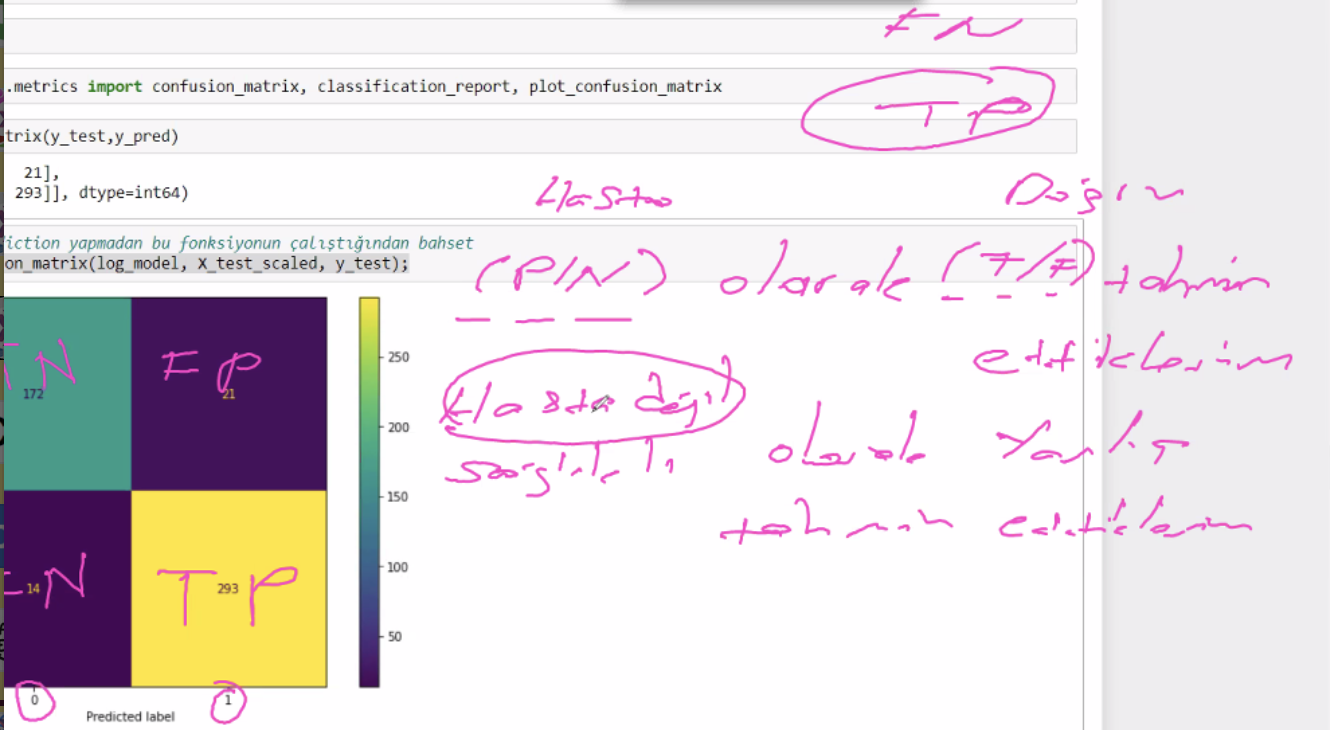

In [ ]:
# modelimizi yukarda log_model = LogisticRegression() ile tanımlamıştık.
# bu object'i (scaled edilmiş) x_test değerlerim ve actual y_test değerlerim ile birlikte plot_confusion_matrix() fonksiyonuna sokuyorum.

plot_confusion_matrix(log_model, X_test_scaled, y_test);

# bu kodu çalıştırmak için prediction yapmaya gerek yok. modeli train yaptıktan sonra bu kodu çalıştırabilirsin.

# plot_confusion_matrix fonksiyonunun da confusion_matrix fonk.daki parametreleri almasını beklerdik fakat farklı parametreleri almış.
# y_pred değerinin --> y_pred = log_model.prediciton(X_test_scaled) den geldiğini düşünürsek. aslında plot_confusion_matrix'in 
# içine yine confusion_matrix fonksiyonu gibi y_test ve y_pred değerlerini almış olduğunu anlıyoruz.

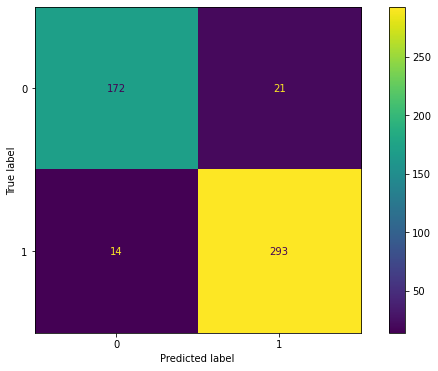

In [69]:
#manuel prediction yapmadan bu fonksiyonun çalıştığından bahset
plot_confusion_matrix(log_model, X_test_scaled, y_test);



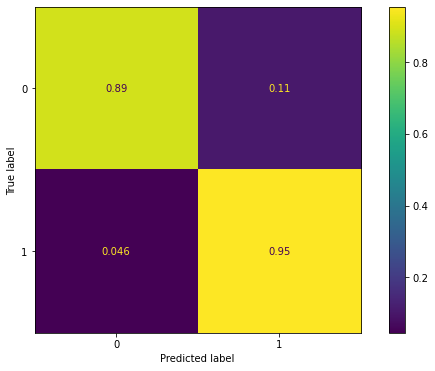

In [70]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

# Normalize=True; true label'lari kendi icinde oranlar. (Ilk satir) 

# yukardaki bize sayıları verirken bu bize oranları veriyor. 

# ilk satır, 0 ların yüzde 89 unu kaçını bilmişim, yüzde 11'ini  bilememişim.
# ikinci satır, 1 lerin yüzde 0.95 ini bilmişim, yüzde 0.46 sını bilememişim.

#  pozitif VE negatif olarak tahmin ettiklerimin YÜZDE kaçı doğru / yanlış

   # toplam negatif tahminlerimin % 92 si doğru, % 0.67 si yanlış
   # toplam pozitif tahminlerimin % 93 ü doğru, % 0.75 i yanlış
   

In [ ]:
Precision: Tahmin ettiğim toplam pozitif değerler içindeki gerçek pozitifler.
negative prediction val : Tahmin ettiğim toplam negatif değerler içindeki gerçek negatifler

Sensitivity: Gerçek pozitifler içinde doğru tahmin ettiğim pozitifler
Specifity : Gerçek negatifler içinde doğru tahmin ettiğim negatifler


precision diyor ki; benim 1 dediklerimin yüzde kaçı doğru
recall diyor ki; gerçekte 1 olanların yüzde kaçını bildim.

In [71]:
print(classification_report(y_test,y_pred))


# classification_report 0 ve 1 siniflarina ait skorlari ayrintili olarak verir.
# 0 ve 1 için bütün skorları tek bir sütunda verdi.
# pred: model tahmin gücü skor:---- gücü

# herzaman f1-score dikkate alıyoruz referansımız bu olmalı.
# data dengesizse makro, dengeli ise micro, çogunluk sınıfın skoruna agırlık verir >> weighted

# aşağıda 0'ı veya 1'i baz alarak hipotezi ortaya koyduğundaki değerleri veriyor. 
# hem 0 hem de 1 bakış açısına göre değerler aşağıda..

# recall diyor ki; gerçekte 1 olanların yüzde kaçını doğru tahmin ettim.
# precision diyor ki; benim 1 tahmin ettiklerimin yüzde kaçı doğru.

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



'macro avg' ve 'weight' skorlari cok sinifli modellerde dikkate alinir.

macro : Datada unbalance durum oldugunda bakilir. 0 ve 1 degerlerini toplar ikiye boler. Mesela precision icin : (0.92 + 0.93 / 2 = 0.93)

weight : unbalance olmayan datalarda dikkate alinir. Buyuk sinifa agirlik verir. Precision icin : [(0'in gozlem sayisi * 0'in olasiligi) + (1'in gozlem sayisi * 1'in olasiligi)] / Toplam gozlem sayisi

Datada butun skorlar birbirine yakinsa yani dengeliyse accuracy (micro score) kullanilir. Cogunluk skoru dikkate almak icin weight, data dengesizse macro score kullanilabilir.

Her zaman modelllerdeki 1 skorlarını artıramaya çalışacağız. Çünkü amacımız mesela hasta tespit edebilmek. Datamızda balance bir durum olduğu için 0 ve 1 değerlerinin tahminleri iyi çıktı ama unbalance durumlarda hasta sayısı az olursa 1 label'ındaki skorlar kötü çıkacak.

Bu tabloyu şöyle okuyoruz:

PRECISION: Tahmin ettiğim toplam pozitif değerler içindeki gerçek pozitifler.
NEGATIVE PREDICTION VAL : Tahmin ettiğim toplam negatif değerler içindeki gerçek negatifler

SENSITIVITY (Recall): Gerçek pozitifler içinde doğru tahmin ettiğim pozitifler
SPECIFITY : Gerçek negatifler içinde doğru tahmin ettiğim negatifler

ya da:

* sütun bazında baktığımızda -- (sütunlar predictlerle alakalı)
    - hasta olarak (1 olarak) tahmin ettiklerimin kaçı doğru --> PRECISION
    - hasta olmayan olarak (0 olarak) tahmin ettiklerimin kaçı doğru --> NEGATIVE PREDICTIVE VALUE
    
* satır bazında baktığımızda--> (satırlar gerçek değerlerle alakalı)
    - hasta olanların (1 lerin) kaçını doğru tahmin etmişim. --> SENSIVITY
    - hasta olmayanların (0 ların) kaçını doğru tahmin etmişim. --> SPECIFICITY
    


In [72]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



Precision : Modelin tahmin gücü recall : Gerçekte o sınıfa ait olanların ne kadarını bilebildim

Amacımız; precision ve recall arasındaki dengeyi sağlayabilmek. Bu ikisinin dengesini sağlayan da F1-Score'dur. F1-Score ikisinin harmonik ortalamasını alır.

Precision çok düşük recall çok yüksekse model sallıyor demek, precision çok yüksek recall çok düşükse model az tahmin yapıyor demektir. Bu yüzden ikisinin dengede olmasını istiyoruz.

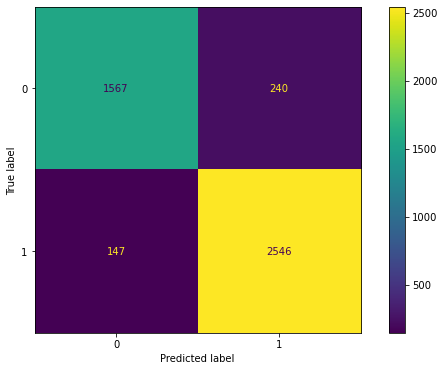

In [73]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

## Cross Validate

Cross Validate: benim yukarda bulduğum ilkel skorum (bir kerede elde ettiğim skorum) modelimi temsil ediyor mu etmiyor mu bunu teyid etmemi sağlar. başka bir görevi yoktur.

In [74]:
from sklearn.model_selection import cross_validate

In [76]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [79]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

# iki clas varsa herzaman bir sınıfını hesaplar.
# scores dediğimiz zaman default olarak Accuracy demek olduğunu bileceğiz.

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.010       0.005          0.900           0.889        0.952    0.919
2      0.007       0.003          0.924           0.921        0.956    0.938
3      0.007       0.003          0.936           0.917        0.981    0.948
4      0.007       0.003          0.931           0.938        0.948    0.943
5      0.007       0.004          0.938           0.941        0.955    0.948
6      0.007       0.004          0.902           0.934        0.900    0.917
7      0.006       0.003          0.898           0.889        0.948    0.917
8      0.007       0.003          0.911           0.896        0.963    0.928
9      0.007       0.003          0.891           0.910        0.907    0.909
10     0.002       0.000          0.916           0.911        0.952    0.931

In [80]:
df_scores.mean()[2:]

test_accuracy    0.915
test_precision   0.915
test_recall      0.946
test_f1          0.930
dtype: float64

In [84]:
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500

Train Set

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

Purpose of ROC Curve:
    1. Analysing the strength/predictive power of a classifier.
    2. Determining optimal threshold.
    3. Comparing two models (using Area Under the Curve).

AUC represents a degree or measure of separability. It tells us how much the model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting the probability of class YES higher than the probability of class NO.

The ROC Curve was first used during World War II for the analysis of radar signals. After the attack on Pearl Harbor, the US army began new research to improve the rate of detection of Japanese aircraft from their radar signals. Needless to say, they did not want to miss any of them. Neither did they wish to waste their resources on false alarms. They measured the ability of a radar receiver operator to make these predictions called the Receiver Operating Characteristic. That is the origin of the name. The purpose of the curve was similar to how we use it to improve our machine learning models now. The aim was to analyse the predictive power of the predictor in ensuring the detection of as many true positives as possible while minimizing false positives.

https://towardsdatascience.com/demystifying-roc-curves-df809474529a

Güçlü olması accuracy veya f1 skorunuzun yüksek olması değil. 0.40 larla 0.60 larla tahmin edilmiş olabilir. başka bir modelde observationlar 0.95 lerle tahmin edilmiş olabilir. 0 olma olasılığı ve 1 olma olasılığı ne kadar birbirinden ayrık ise o kadar strength tir güçlüdür diyoruz. Yani tahminleri yaparken (class lara ayırırken) aralarının ne kadar açık olduğunu gösteriyor

benzer skorları almış iki modeliniz var. diyelim ki iki modelin de f1 skorları 0.85. siz bunların ROC AUC skorlarına bakarak seçim yapacaksınız. birinin ROC AUC skoru 0.80 öbürünün 0.60 ise 0.80 olanı seçeceksiniz. Çünkü onun 0 ve 1 leri ayırma gücü daha fazladır.

ROC/AUC curve'in altında kalan alana bakıyorum. bu alan ne kadar büyükse ayırt edilebilirlik o kadar fazla demektir.

Data Imbalance olduğunda ROC/AUC alanına değil, Recall-Precision eğrisine bakıyorum.

In [58]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

1 sınıfını düşman, 0 sınıfını dost gibi düşünüyoruz ve amacımız düşmanı tespit etmek.

y ekseni, düşman olarak doğru tahmin ettiklerimiz. (True Positive Rate)

x ekseni, düşman olarak yanlış tahmin ettiklerimiz. (False Positive Rate)

ROC/AUC; birçok treshold değeri belirler ve buna göre eksende noktalar bulur. (Treshold = 0.5'e göre düşman olduğunu bildim veya bilemedim gibi.) Bu noktaların altında kalan alan ne kadar büyükse, model dost ile düşmanı ayırmakta o kadar başarılı demektir.

Amacımız, True Positive Rate' i artırıp False Positive Rate'i düşürmek. Modelimizin başarısı 0.96 (Grafiğin sağ altında).

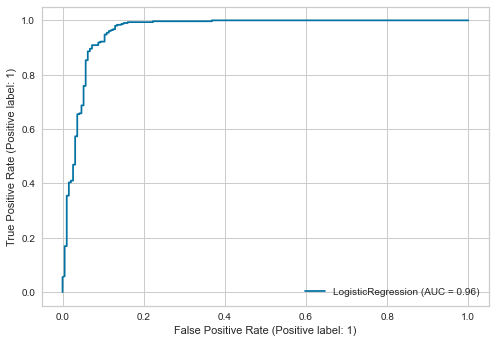

In [59]:
plot_roc_curve(log_model, X_test_scaled, y_test);

# true positive rate demek "recall" demek. yani gerçekte 1 lerin yüzde kaçını bildim.

# false positive rate ise 0 ların yüzde kaçını bilemedim.



Tahmin ettiğim toplam pozitif değerler içindeki gerçek pozitifler.

yukardaki grafiğe bakarak modelin güçlü olduğunu anlayabiliyoruz. 0 ları 1 leri çok iyi ayırt edebiliyor. 

Datasetim dengeli (balance) olduğu için True Pos.rate-False Pos.rate curve skorum ile (bir yukardaki screes shotta gözüken) precision-recall curve skorum aynı sonucu verdi.  Ama dengesiz (imbalace) olduğunda, ki ML-9'daki diabet buna örnektir, bu iki skor farklı çıkacaktır ve ben bu durumda precision-recall curve'e bakmam gerekir.

In [60]:
roc_auc_score(y_test, y_pred_proba[:,1])

# roc_auc_score, proba ile çiziliyor. (olasılık değerleri ile çiziliyor)
# Yukarıdaki skoru grafik çizmeden de alabiliriz. 1' e ait olasılık değerleri için probanın 1. indexini aldık.

0.9630132824762451

!!!!!! Dengeli datasetlerinde ROC / AUC, dengesiz datasetlerinde Precision Recall Curve kullanılır. !!!!!

In [61]:
roc_auc_score(y_test, y_pred) 

# buu yannışş olan. 
# !!!! Bu kod yanlış. 1 sınıfına ait olasılıkları vermek için y_pred_proba[:,1] verilmeli!!!!!!!

0.9227945519906837

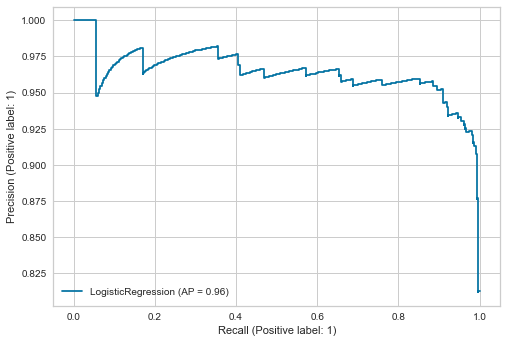

In [62]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

## Final Model and Model Deployment

In [75]:
scaler = StandardScaler().fit(X) 

# Tüm dataya scaler işlemini uyguluyoruz.
# fit edilmiş kısmıyla kaydet sadece fit transform yaparsan sonradan predic yapınca hata alırsın

In [76]:
import pickle
pickle.dump(scaler, open("scaler_hearing", 'wb'))

# pickle --> turşu turşusunu kuruyoruz

pickle.dump'ın içine modelimizi hangi isimle kaydedeceğimizi yazıyoruz ve wb olarak kaydet diyoruz. Scale edilmiş datayı kaydetmeden önce sadece fit işlemi uyguluyoruz, transformu kayıt işleminden sonra uyguluyoruz. Yoksa sonradan prediction yaptıracağımız datalarla çalışma yaparken hata alırız.

In [77]:
X_scaled = scaler.transform(X)

# Datanın hepsine transform işlemini uyguladık.

In [78]:
final_model = LogisticRegression().fit(X_scaled, y)

Modeli lokalimize kaydetmek için tekrar open deyip hangi isimle ve formatla kaydetmek istediğimizi yazıyoruz. Böylece scale - fit edilmiş datayı ve modelimizi lokalimize kaydetmiş olduk.

In [79]:
pickle.dump(final_model, open("final_model_hearing", 'wb')) # write binary

Modelimizie bir tahmin yaptıralım. Bunun için aşağıda bir dict içinde tahmin etmek istediğimiz değerleri veriyoruz. Ardından DataFrame'e dönüştürüyoruz.

In [80]:
my_dict = {"age": [20, 30, 40, 50, 60],
           "physical_score": [50, 30, 20, 10, 5]}

In [81]:
sample = pd.DataFrame(my_dict)
sample

age  physical_score
0   20              50
1   30              30
2   40              20
3   50              10
4   60               5

Yukarıda kaydettiğimiz scaler'ı tahmin yapması için çağırıyoruz. Bu sefer 'wb' yerine 'rb' yazıyoruz çünkü okutma işlemi yapıyoruz.

In [82]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb")) # read binary

!!!!!!! Scaler'ı transformsuz kaydetmiştik, transform işlemini burda yapıyoruz !!!!!!!!!!

In [83]:
sample_scaled = scaler_hearing.transform(sample)
sample_scaled

array([[-2.80075819,  2.11038956],
       [-1.91469467, -0.33789511],
       [-1.02863115, -1.56203745],
       [-0.14256762, -2.78617979],
       [ 0.7434959 , -3.39825096]])

!!!!!!! Scaler'ı transformsuz kaydetmiştik, transform işlemini burda yapıyoruz !!!!!!!!!!

In [84]:
final_model = pickle.load(open("final_model_hearing", "rb"))

In [85]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

Karşılaştırmayı daha iyi yapabilmek için hem 'predict' hem de 'predict_proba' yı kullandık.

Az önce oluşturduğumuz DataFrame olan sample'a prediction' larımızı sütun olarak ekledik ki sonuçları karşılaştıralım.

In [86]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

age  physical_score  pred  pred_proba
0   20              50     1       1.000
1   30              30     1       0.730
2   40              20     0       0.016
3   50              10     0       0.000
4   60               5     0       0.000